In [4]:
import numpy as np
import torch
from torch.distributions import Uniform
from scipy.stats import norm
import pickle

import matplotlib.pyplot as plt

In [32]:
sigma_noise = 0.1
M=200#120

(40, 40)


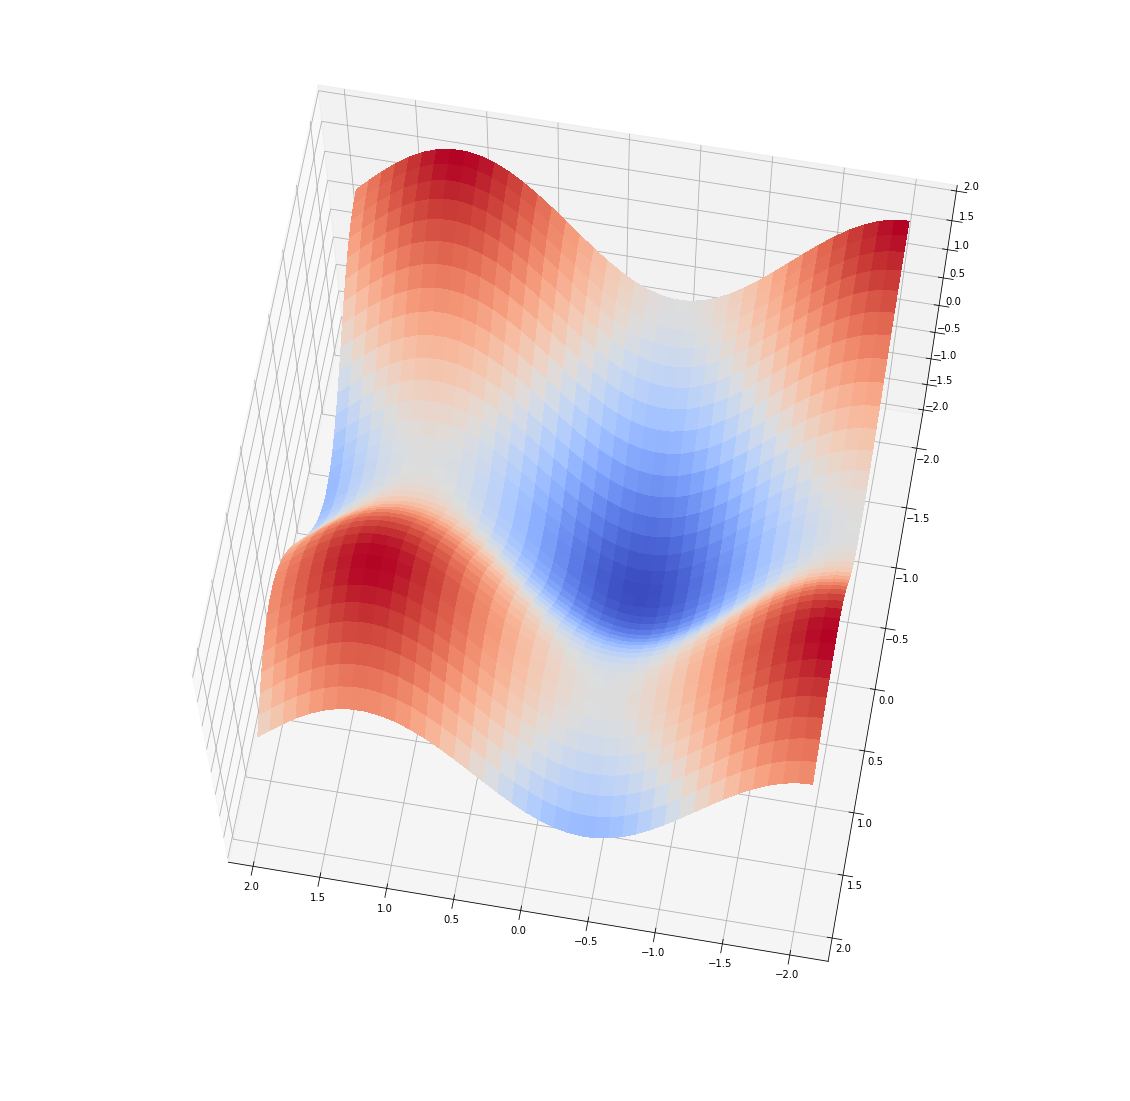

In [33]:
from matplotlib import cm
%matplotlib inline

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
print(X.shape)
Z=np.cos(2.0*(X+2.))+np.cos(2.0*(Y+2.))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-2.01, 2.01)

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(elev=70., azim=100)

plt.show()

    

(10, 10) (10, 10)


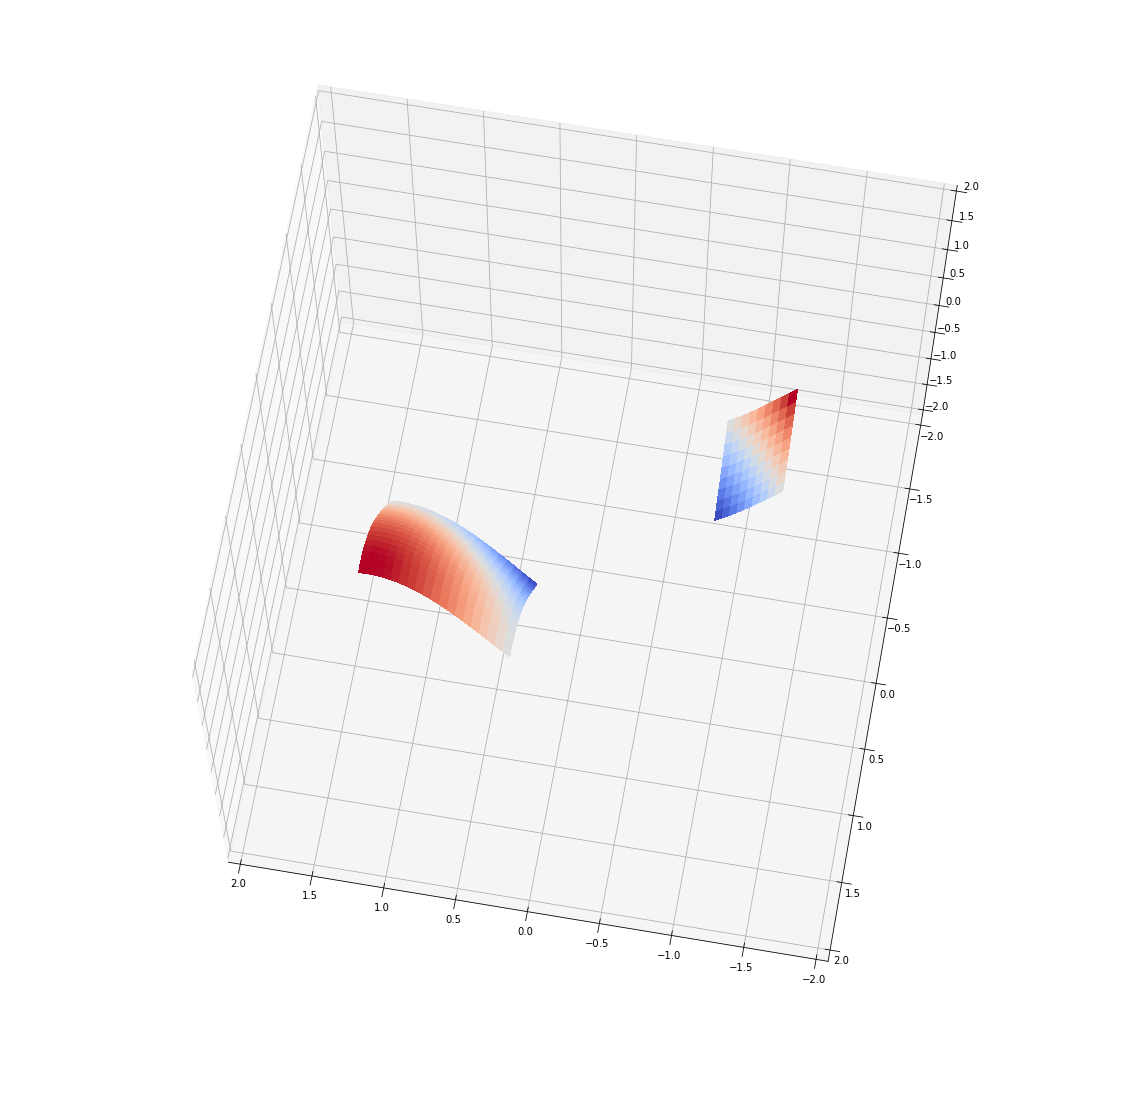

In [34]:

from matplotlib import cm
%matplotlib inline


fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-1.25, -0.75, 0.05)
Y = np.arange(-1.25, -0.75, 0.05)
X, Y = np.meshgrid(X, Y)
Z=np.cos(2.0*(X+2.))+np.cos(2.0*(Y+2.))
print(X.shape,Z.shape)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

X = np.arange(0.25, 1.25, 0.05)
Y = np.arange(0.25, 1.25, 0.05)
X, Y = np.meshgrid(X, Y)
Z=np.cos(2.0*(X+2.))+np.cos(2.0*(Y+2.))

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-2.01, 2.01)
ax.set_xlim(-2.,2.)
ax.set_ylim(-2.,2.)
# Add a color bar which maps values to colors.
ax.view_init(elev=70., azim=100)

plt.show()


    

In [35]:
Z=np.cos(X)+np.cos(Y)
Z.shape

(20, 20)

In [36]:
def Wave2D(X):
    return torch.cos(2.0*(X+2.)).sum(dim=1)



(-2.0, 2.0)

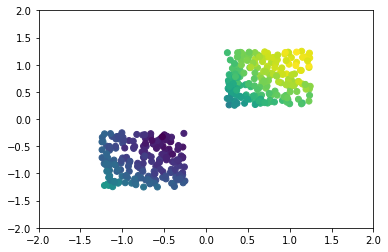

In [37]:


X_1=torch.rand(M,2)-1.25#torch.Tensor([1.5,1.5])
X_2=torch.rand(M,2)+0.25#torch.Tensor([0.5,0.5])

X=torch.cat([X_1,X_2], dim=0)
X.shape

e =0.1* torch.randn(2*M)
Y = Wave2D(X) + e
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlim(-2.,2.)
plt.ylim(-2.,2.)


(-2.0, 2.0)

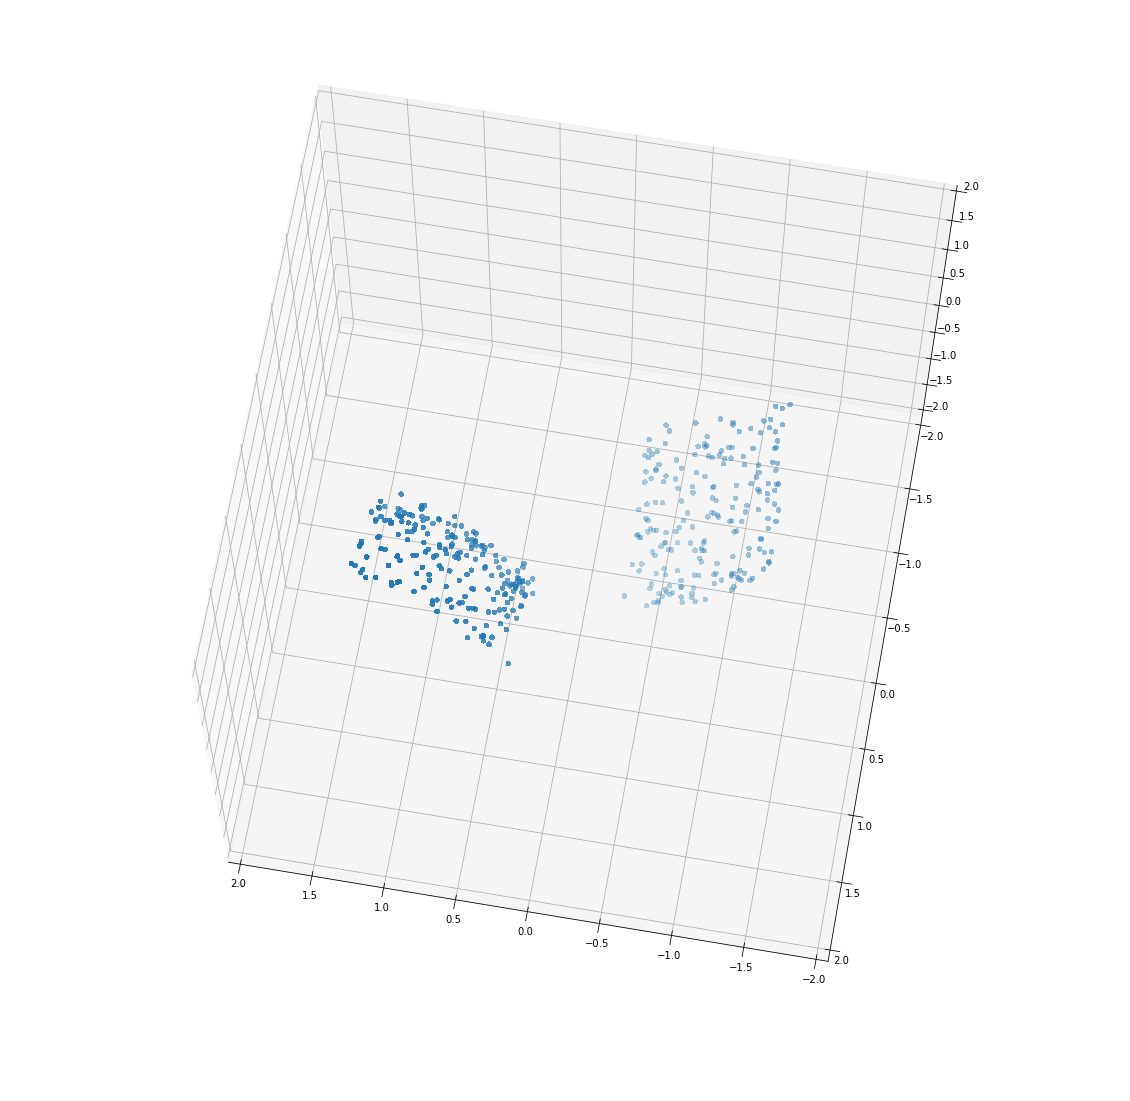

In [38]:
e =0.1* torch.randn(2*M)
Y = Wave2D(X) + e

%matplotlib inline

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

# Plot the surface.
ax.scatter(X[:,0], X[:,1], Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.view_init(elev=70., azim=100)

# Customize the z axis.
ax.set_zlim(-2.01, 2.01)
ax.set_xlim(-2.,2.)
ax.set_ylim(-2.,2.)


In [39]:
X.shape,Y.shape

(torch.Size([400, 2]), torch.Size([400]))

In [40]:
torch.save((X,Y),'foong_2D_train.pt')

In [41]:
M=5000
X=torch.rand(M,2)*4.-2.
e =0.1* torch.randn(M)
Y = Wave2D(X) + e
Y.shape

torch.Size([5000])

In [42]:
torch.save((X,Y),'foong_2D_test.pt')

(-2.0, 2.0)

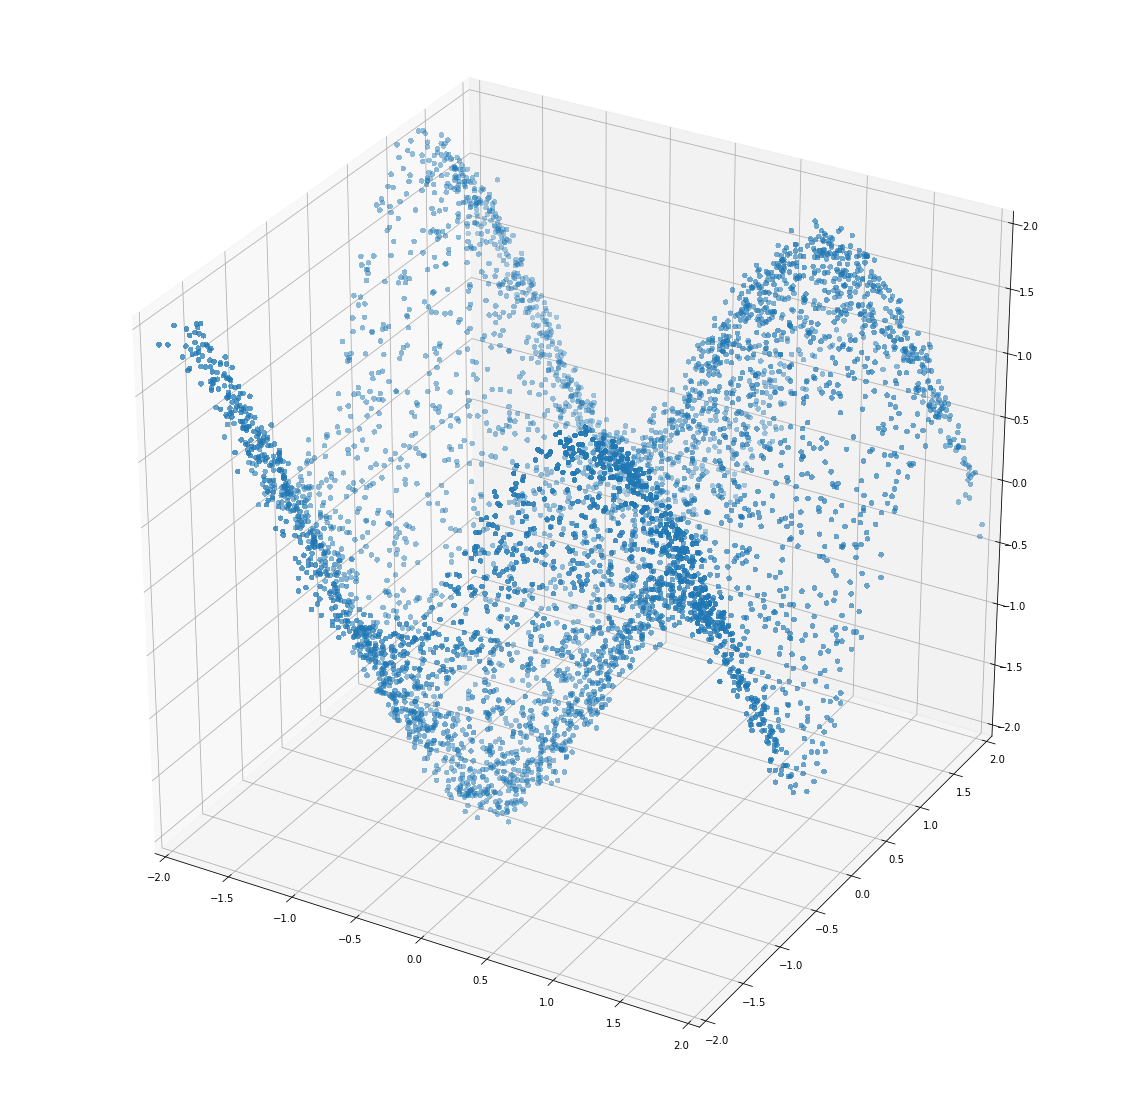

In [43]:
%matplotlib inline

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

# Plot the surface.
ax.scatter(X[:,0], X[:,1], Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-2.01, 2.01)
ax.set_xlim(-2.,2.)
ax.set_ylim(-2.,2.)


In [31]:
device='cpu'
n=100
X=torch.linspace(-2,2,n).to(device)
Y=torch.linspace(-2,2,n).to(device)
X, Y = torch.meshgrid(X, Y)
XX=torch.stack([X,Y]).view(-1,2)
XX.view(2,n,n)

tensor([[[-2.0000, -2.0000, -2.0000,  ..., -2.0000, -2.0000, -2.0000],
         [-1.9596, -1.9596, -1.9596,  ..., -1.9596, -1.9596, -1.9596],
         [-1.9192, -1.9192, -1.9192,  ..., -1.9192, -1.9192, -1.9192],
         ...,
         [ 1.9192,  1.9192,  1.9192,  ...,  1.9192,  1.9192,  1.9192],
         [ 1.9596,  1.9596,  1.9596,  ...,  1.9596,  1.9596,  1.9596],
         [ 2.0000,  2.0000,  2.0000,  ...,  2.0000,  2.0000,  2.0000]],

        [[-2.0000, -1.9596, -1.9192,  ...,  1.9192,  1.9596,  2.0000],
         [-2.0000, -1.9596, -1.9192,  ...,  1.9192,  1.9596,  2.0000],
         [-2.0000, -1.9596, -1.9192,  ...,  1.9192,  1.9596,  2.0000],
         ...,
         [-2.0000, -1.9596, -1.9192,  ...,  1.9192,  1.9596,  2.0000],
         [-2.0000, -1.9596, -1.9192,  ...,  1.9192,  1.9596,  2.0000],
         [-2.0000, -1.9596, -1.9192,  ...,  1.9192,  1.9596,  2.0000]]])

In [33]:
X_=XX.view(2,n,n)
X_.shape

torch.Size([2, 100, 100])

In [34]:
X_==torch.stack([X,Y])

tensor([[[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]]])